# Finger exercises in Guttag
## Chapters 14-16
### Section 15.1.1 (p. 213)
Modify the code in Guttag figure 15.3 to produce the plot shown on p. 213.

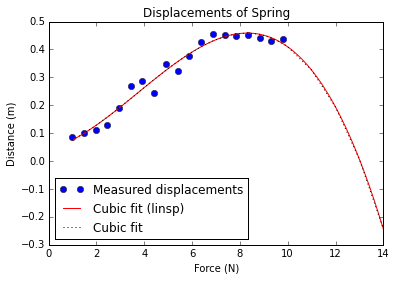

In [11]:
%matplotlib inline
import pylab

def getData(fileName):
    with open(fileName, 'r') as dataFile:
        distances = []
        masses    = []
        discardHeader = dataFile.readline() # Get rid of header line
        for line in dataFile:               # Loop over lines in input file
            d, m = line.split(' ')          # Split input line on space
            distances.append(float(d))
            masses.append(float(m))
    return (masses, distances)

def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)      # Convert list to array
    masses    = pylab.array(masses)
    forces    = masses * 9.81   # Application of math to all members of array
    
    # Do some plotting
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Displacements of Spring')
    pylab.xlabel('Force (N)')
    pylab.ylabel('Distance (m)')
    
    # Find cubic fit
    a,b,c,d = pylab.polyfit(forces, distances, 3) # <- Note use of cubic fit
    
    # Add some more x values to fit
    # The linspace() version
    fitForces = pylab.linspace(1,14,100) # 100 points evenly spaced from 1 to 14
    fitDistances = a*(fitForces**3) + b*(fitForces**2) + c*fitForces + d
    pylab.plot(fitForces, fitDistances, 'r-', label = 'Cubic fit (linsp)')
    
    # Or just extend the existing array
    forces = pylab.append(forces, pylab.array(range(10,15)))
    predictedDistances = a*(forces**3) + b*(forces**2) + c*forces + d
    pylab.plot(forces, predictedDistances, 'k:', label = 'Cubic fit')
    
    # Add a legend
    pylab.legend(loc = 'best')

    # Save the figure
    pylab.savefig('Ch15.png', dpi=300)
    
fitData('springData.txt') # Feel the badness!
